In [89]:
# importing required library
import pandas as pd
import numpy as np

In [2]:
# loading the cleaned data from previous notebook
df = pd.read_excel('F:\\Learning\\Hackathons\\Kaggle\\Titanic\\df_Part1_cleaned.xlsx')

In [3]:
# high level view of the data
df.head()

,Pclass,Sex,SibSp,Parch,Ticket,Embarked,Survived,Title_Status,Family_Size,Group_Size,Fare_sc,Age_sc
0,1,male,0,0,693,S,0.0,Married,0,0,0.082089,2.586346
1,1,male,0,0,695,S,0.0,Married,0,0,-0.928437,0.236140
2,3,male,0,0,1601,S,1.0,Married,0,7,1.549555,0.160327
3,3,male,0,0,1601,S,0.0,Married,0,7,1.549555,-0.142925
4,3,male,0,0,1601,S,1.0,Married,0,7,1.549555,-0.294552


In [4]:
# Checking the data type for each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        1309 non-null   int64  
 1   Sex           1309 non-null   object 
 2   SibSp         1309 non-null   int64  
 3   Parch         1309 non-null   int64  
 4   Ticket        1309 non-null   object 
 5   Embarked      1309 non-null   object 
 6   Survived      891 non-null    float64
 7   Title_Status  1309 non-null   object 
 8   Family_Size   1309 non-null   int64  
 9   Group_Size    1309 non-null   int64  
 10  Fare_sc       1309 non-null   float64
 11  Age_sc        1309 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB


In [5]:
df_1 = df.drop(columns = ['Ticket'])

In [6]:
# converting the data type of the column
df_1.Pclass = df_1.Pclass.astype(str)

In [7]:
# changing the position of our target variable for ease of analysis

sur = df_1['Survived']
df_1.drop(labels=['Survived'], 
        axis=1, 
        inplace = True)

In [8]:
df_1.insert(10, 'Survived', sur)
df_1.head()

,Pclass,Sex,SibSp,Parch,Embarked,Title_Status,Family_Size,Group_Size,Fare_sc,Age_sc,Survived
0,1,male,0,0,S,Married,0,0,0.082089,2.586346,0.0
1,1,male,0,0,S,Married,0,0,-0.928437,0.236140,0.0
2,3,male,0,0,S,Married,0,7,1.549555,0.160327,1.0
3,3,male,0,0,S,Married,0,7,1.549555,-0.142925,0.0
4,3,male,0,0,S,Married,0,7,1.549555,-0.294552,1.0


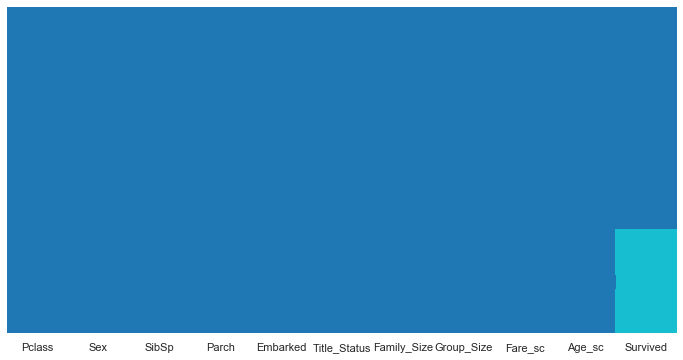

In [11]:
# taking an overview of the data in a condensed form 

import seaborn as sns

sns.set(rc={'figure.figsize':(12,6)})
fig = sns.heatmap(df_1.isnull(), 
            cbar = False,
            yticklabels = False , cmap = 'tab10')

In [12]:
# saving the plot to local drive
fig.get_figure().savefig("F:\\Learning\\Hackathons\\Kaggle\\Titanic\\view.png")

In [20]:
# encoding the object type columns 
df_dummy = pd.get_dummies(df_1)
df_dummy.head()

,SibSp,Parch,Family_Size,Group_Size,Fare_sc,Age_sc,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Status_Married,Title_Status_Others,Title_Status_Un-Married
0,0,0,0,0,0.082089,2.586346,0.0,1,0,0,0,1,0,0,1,1,0,0
1,0,0,0,0,-0.928437,0.236140,0.0,1,0,0,0,1,0,0,1,1,0,0
2,0,0,0,7,1.549555,0.160327,1.0,0,0,1,0,1,0,0,1,1,0,0
3,0,0,0,7,1.549555,-0.142925,0.0,0,0,1,0,1,0,0,1,1,0,0
4,0,0,0,7,1.549555,-0.294552,1.0,0,0,1,0,1,0,0,1,1,0,0


In [21]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SibSp                    1309 non-null   int64  
 1   Parch                    1309 non-null   int64  
 2   Family_Size              1309 non-null   int64  
 3   Group_Size               1309 non-null   int64  
 4   Fare_sc                  1309 non-null   float64
 5   Age_sc                   1309 non-null   float64
 6   Survived                 891 non-null    float64
 7   Pclass_1                 1309 non-null   uint8  
 8   Pclass_2                 1309 non-null   uint8  
 9   Pclass_3                 1309 non-null   uint8  
 10  Sex_female               1309 non-null   uint8  
 11  Sex_male                 1309 non-null   uint8  
 12  Embarked_C               1309 non-null   uint8  
 13  Embarked_Q               1309 non-null   uint8  
 14  Embarked_S              

In [22]:
# splitting the data into originally given train and test again
df_train = df_dummy[df_dummy.Survived.isnull() == False]
df_test = df_dummy[df_dummy.Survived.isnull() == True]

In [23]:
# checking if the split was correct
df_train.tail()

,SibSp,Parch,Family_Size,Group_Size,Fare_sc,Age_sc,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Status_Married,Title_Status_Others,Title_Status_Un-Married
886,0,0,0,0,-0.805730,-0.612967,0.0,0,0,1,1,0,0,0,1,0,0,1
887,1,0,1,1,1.774719,1.221710,0.0,1,0,0,0,1,0,0,1,1,0,0
888,0,0,0,0,-0.663775,0.008701,0.0,0,1,0,0,1,0,0,1,1,0,0
889,0,2,2,1,2.023443,0.463579,1.0,1,0,0,1,0,0,0,1,0,0,1
890,1,1,2,1,2.023443,3.041225,0.0,1,0,0,0,1,0,0,1,0,1,0


In [24]:
df_test.head()

,SibSp,Parch,Family_Size,Group_Size,Fare_sc,Age_sc,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Status_Married,Title_Status_Others,Title_Status_Un-Married
891,0,0,0,0,-0.792295,0.349860,NaN,0,0,1,0,1,0,1,0,1,0,0
892,1,0,1,0,-0.832196,1.297524,NaN,0,0,1,1,0,0,0,1,1,0,0
893,0,0,0,0,-0.702873,2.434720,NaN,0,1,0,0,1,0,1,0,1,0,0
894,0,0,0,0,-0.752196,-0.218738,NaN,0,0,1,0,1,0,0,1,1,0,0
895,1,1,2,1,-0.577760,-0.597804,NaN,0,0,1,1,0,0,0,1,1,0,0


In [25]:
# Splitting data into X and y

X_train = df_train.drop(columns = ['Survived'])
y_train = df_train['Survived']

X_test = df_test.drop(columns = ['Survived'])
#y_test is what will be predicting

In [144]:
# importing required libraries

import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from sklearn.model_selection import (train_test_split,KFold, 
                                     cross_val_predict, 
                                     GridSearchCV, RandomizedSearchCV)

from sklearn.metrics import (auc, roc_curve, roc_auc_score, 
                             precision_score, recall_score, 
                             confusion_matrix,f1_score, 
                             classification_report, accuracy_score)

In [28]:
# initializing base-models
lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()

In [29]:
# creating a dictionary for all initialized classifiers
clf = {
    
    'Logistic Regression' : lr,
    'Naive Bayes' : nb,
    'KNN' : knn,
    'Decision Tree' : dt,
    'Random Forest' : rf,
    'XGBoost' : xgb
    
}

In [151]:
# defining a dataframe for storing evaluation scores for calssifiers

df_scores = pd.DataFrame(columns = ['Model Name','Model Type','Threshold',
                                    'Accuracy Score','Sensitivity or Recall',
                                    'Specificity','Precision','F1-Score','AUC'])

In [152]:
# defining an empty dataframe to store the predictions for test dataset by each classifier

df_pred = pd.DataFrame()

In [137]:
# defining function for splitting the data for training and validation

def prepare_data(X,y):
    
    return train_test_split(X,y,random_state = 41)

In [149]:
# defining function for comparing models based on various classification performance indicators

def model_performance(model_name,model,X,y,X_test,model_type):
    # a is a subset of X_train for the same purpose as X_train
    # b is a subset of X_train and is for validation
    # c is a subset of y_train for the same purpose as y_train
    # d is a subset of y_train and is for validation
    a,b,c,d = prepare_data(X,y)
    
    # fittinf the model with X_train subset and y_train subset
    model_fitted = model.fit(a,c)
    
    # getting prediction with validation set
    val_pred = model_fitted.predict(b)
    # getting prediction for main test set
    test_pred = model_fitted.predict(X_test)
    
    # generating confusion matrix
    cm = confusion_matrix(d,val_pred)
    print('\n Confusion matrix :\n',cm)
    print('\n Classification report :\n',classification_report(d,val_pred))
    
    # getting probabilities for ROC_AUC
    prob = model_fitted.predict_proba(b)
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(d,prob_positive)
    roc_auc = auc(fpr,tpr)
    
    # feeding the scores in the dataframe
    df_scores.loc[len(df_scores.index)] = [model_name,
                                           model_type,
                                           threshold.mean(),
                                           model_fitted.score(b,d),
                                           cm[0][0]/(cm[0][0]+cm[0][1]),
                                           cm[1][1]/(cm[1][1]+cm[1][0]),
                                           cm[0][0]/(cm[0][0]+cm[1][0]),
                                           f1_score(d,val_pred),
                                           roc_auc
                                          ]
    
    # plotting applicable graphs for each classifier
    try:
        print('\n Visual Representation of Feature Importance :')
        sns.barplot(y=a.columns,
                    x=model_fitted.feature_importances_)
        plt.show()
    except AttributeError:
        print('\nFeature Importance details not availabe for this model')
    
    try:
        plt.figure(figsize=(15,8))
        tree.plot_tree(model_fitted, 
                       feature_names=X.columns, 
                       filled=True,
                       precision=2,
                       proportion=True,
                       rounded=True)
        plt.show()
    except:
        print('Trees can not be generated for the model')
              
    try:
        plt.title("receiver Operating Charecteristc")
        plt.plot(fpr,tpr,'red',label = 'AUC=%0.2f'% roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0,1],[0,1], color = 'darkblue',linestyle='--')
        plt.ylabel('True positive Rate')
        plt.xlabel('False positive Rate')
        plt.show()
    except:
        print('Can not generate ROC_AUC curve for the model')
    return (test_pred)
    

In [139]:
# defining a function to run the models the same way a pipeline method does
def run_models(clf,X,y,x,model_type = 'Baseline'):
    
    for i,e in enumerate(clf):
        print(i+1,'Performance of ',e)
        df_pred[e+model_type] = model_performance(e,clf.get(e),X,y,x,model_type=model_type)
        
        print('____________________________________________________________________')
        

1 Performance of  Logistic Regression

 Confusion matrix :
 [[117  24]
 [ 15  67]]

 Classification report :
               precision    recall  f1-score   support

         0.0       0.89      0.83      0.86       141
         1.0       0.74      0.82      0.77        82

    accuracy                           0.83       223
   macro avg       0.81      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223


 Visual Representation of Feature Importance :

Feature Importance details not availabe for this model
Trees can not be generated for the model


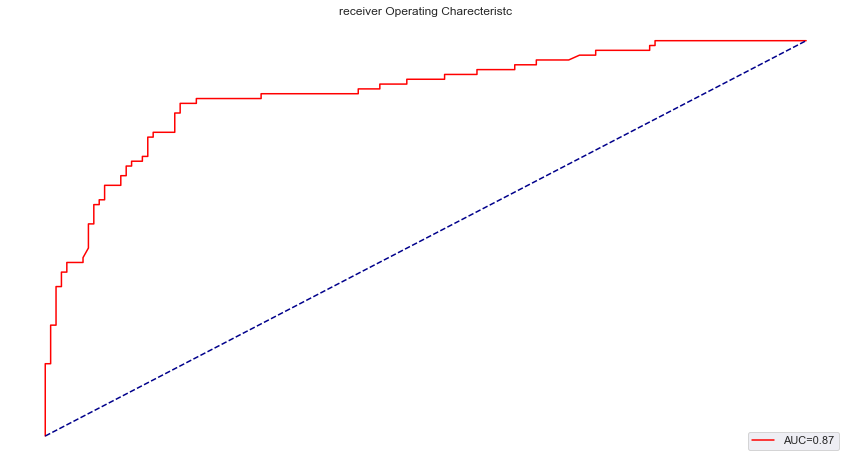

____________________________________________________________________
2 Performance of  Naive Bayes

 Confusion matrix :
 [[104  37]
 [ 12  70]]

 Classification report :
               precision    recall  f1-score   support

         0.0       0.90      0.74      0.81       141
         1.0       0.65      0.85      0.74        82

    accuracy                           0.78       223
   macro avg       0.78      0.80      0.78       223
weighted avg       0.81      0.78      0.78       223


 Visual Representation of Feature Importance :

Feature Importance details not availabe for this model
Trees can not be generated for the model


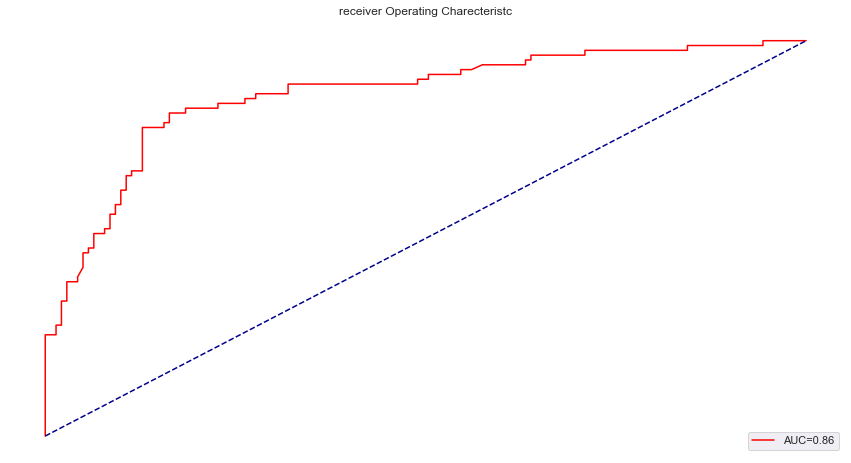

____________________________________________________________________
3 Performance of  KNN

 Confusion matrix :
 [[118  23]
 [ 22  60]]

 Classification report :
               precision    recall  f1-score   support

         0.0       0.84      0.84      0.84       141
         1.0       0.72      0.73      0.73        82

    accuracy                           0.80       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223


 Visual Representation of Feature Importance :

Feature Importance details not availabe for this model
Trees can not be generated for the model


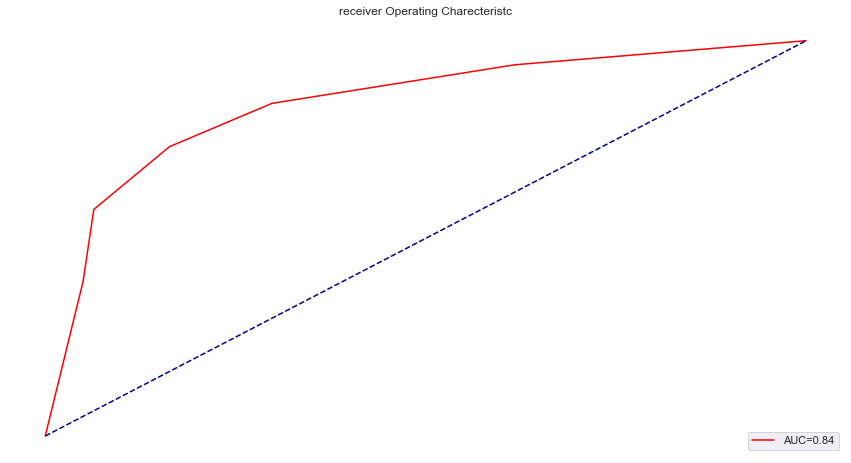

____________________________________________________________________
4 Performance of  Decision Tree

 Confusion matrix :
 [[112  29]
 [ 20  62]]

 Classification report :
               precision    recall  f1-score   support

         0.0       0.85      0.79      0.82       141
         1.0       0.68      0.76      0.72        82

    accuracy                           0.78       223
   macro avg       0.76      0.78      0.77       223
weighted avg       0.79      0.78      0.78       223


 Visual Representation of Feature Importance :


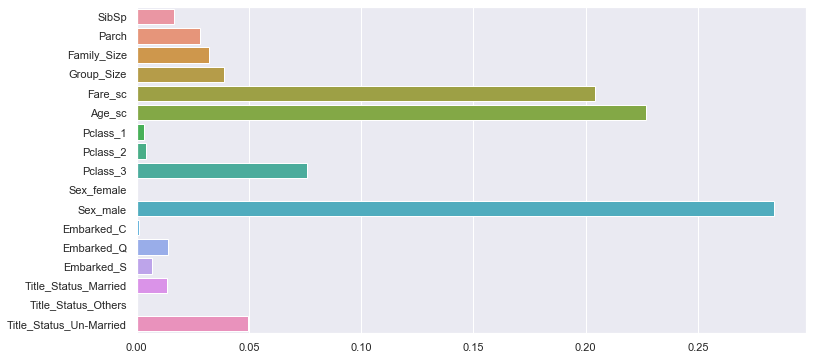

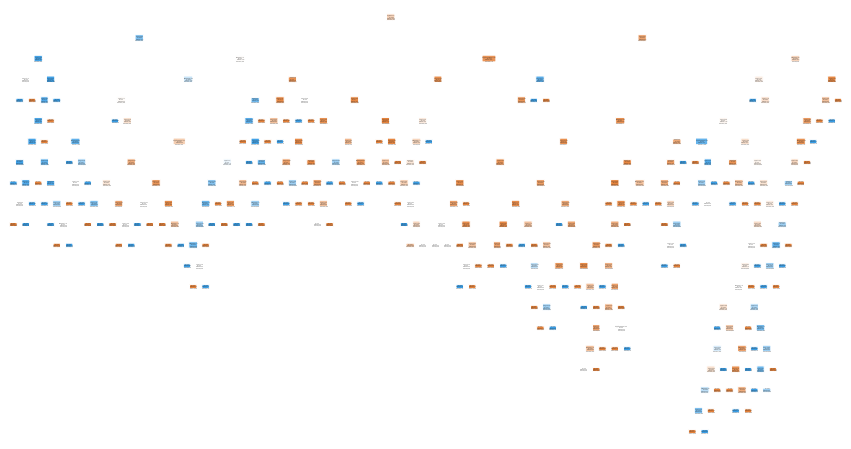

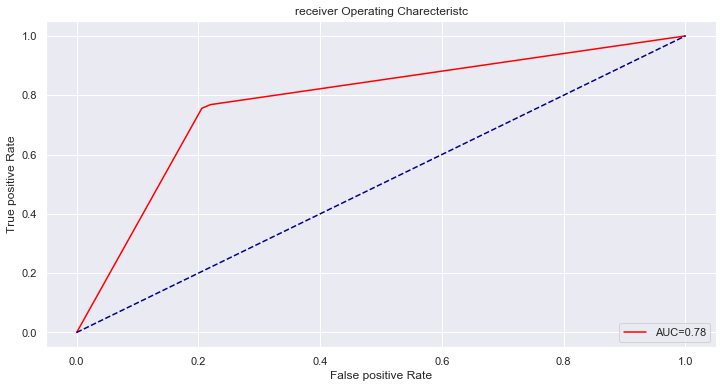

____________________________________________________________________
5 Performance of  Random Forest

 Confusion matrix :
 [[119  22]
 [ 17  65]]

 Classification report :
               precision    recall  f1-score   support

         0.0       0.88      0.84      0.86       141
         1.0       0.75      0.79      0.77        82

    accuracy                           0.83       223
   macro avg       0.81      0.82      0.81       223
weighted avg       0.83      0.83      0.83       223


 Visual Representation of Feature Importance :


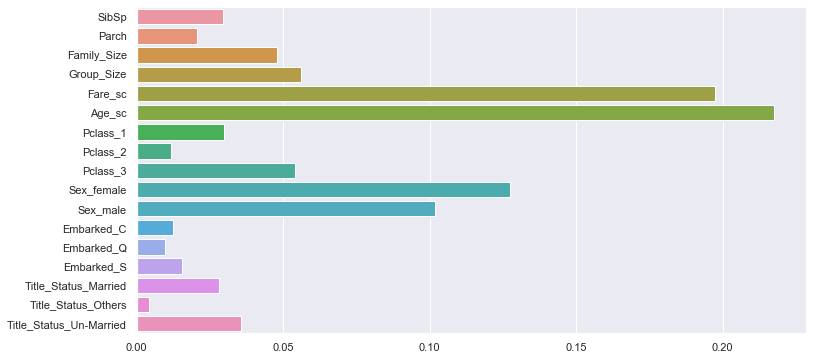

Trees can not be generated for the model


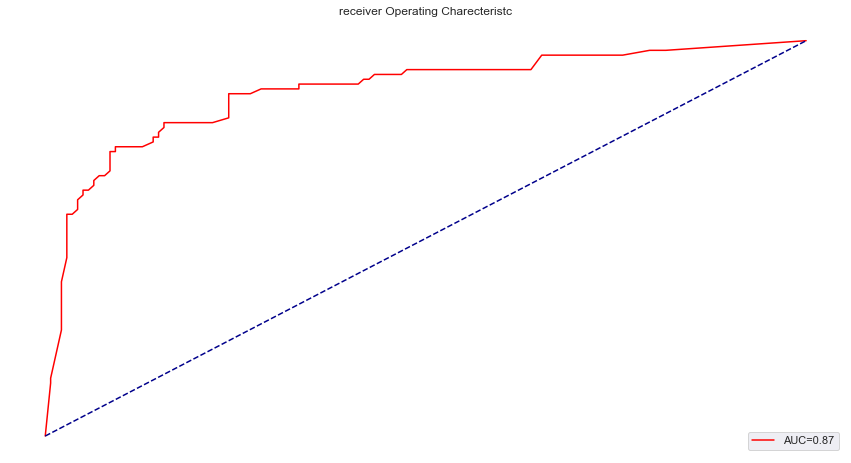

____________________________________________________________________
6 Performance of  XGBoost

 Confusion matrix :
 [[118  23]
 [ 19  63]]

 Classification report :
               precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       141
         1.0       0.73      0.77      0.75        82

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223


 Visual Representation of Feature Importance :


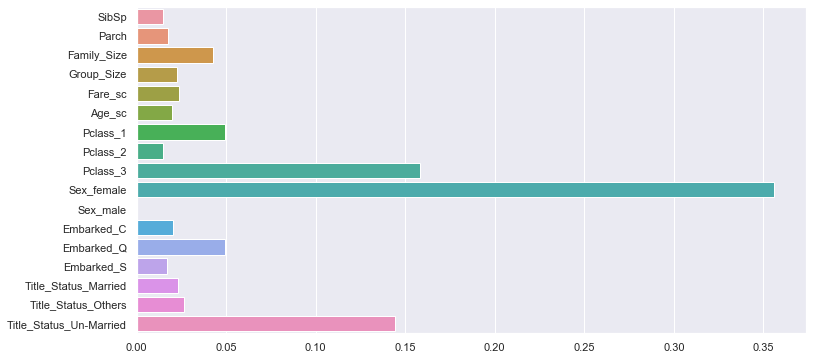

Trees can not be generated for the model


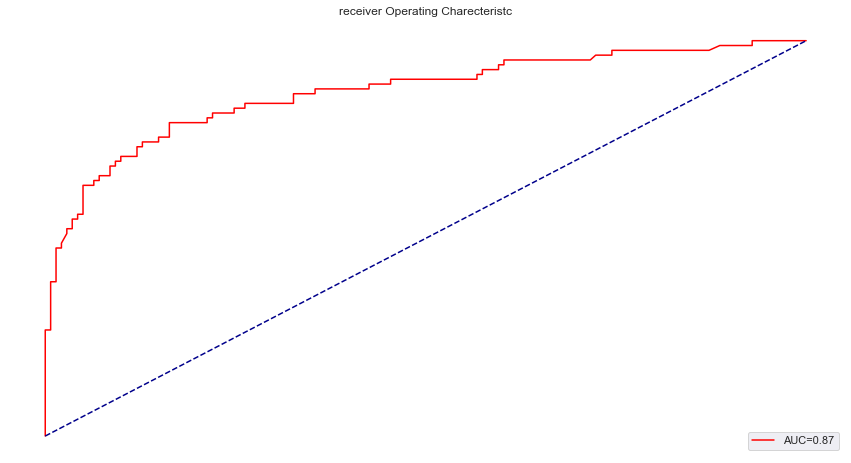

____________________________________________________________________


In [153]:
# executing the finctions
run_models(clf,X_train,y_train,X_test,model_type = 'Baseline')

In [154]:
#checking the scores
df_scores

,Model Name,Model Type,Threshold,Accuracy Score,Sensitivity or Recall,Specificity,Precision,F1-Score,AUC
0,Logistic Regression,Baseline,0.459720,0.825112,0.829787,0.817073,0.886364,0.774566,0.867843
1,Naive Bayes,Baseline,0.571147,0.780269,0.737589,0.853659,0.896552,0.740741,0.864383
2,KNN,Baseline,0.714286,0.798206,0.836879,0.731707,0.842857,0.727273,0.842718
3,Decision Tree,Baseline,0.875000,0.780269,0.794326,0.756098,0.848485,0.716763,0.778326
4,Random Forest,Baseline,0.429701,0.825112,0.843972,0.792683,0.875000,0.769231,0.874027
5,XGBoost,Baseline,0.415398,0.811659,0.836879,0.768293,0.861314,0.750000,0.870394


In [155]:
# checking the predictions
df_pred.head()

,Logistic RegressionBaseline,Naive BayesBaseline,KNNBaseline,Decision TreeBaseline,Random ForestBaseline,XGBoostBaseline
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,1.0,1.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0


In [156]:
# extracting the data sets to feed into parameter tuning
X_train_sub,X_val,y_train_sub,y_val = prepare_data(X_train,y_train)

#### Hyperparameter tuning for classifiers

In [160]:
# Tuning Logistic regression

lr_param =  {
                'penalty' : ['l1', 'l2'],
                'C' : np.linspace(1, 5, 10)
             }
lr_rs = RandomizedSearchCV(lr,
                           param_distributions=lr_param,
                           n_iter=5,
                           scoring='roc_auc',
                           n_jobs=-1,
                           cv=5,
                           verbose=3)
lr_rs.fit(X_train_sub,y_train_sub)
lr_rs.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.2s finished


LogisticRegression(C=2.7777777777777777)

In [161]:
lr_tuned = LogisticRegression(C=2.7)

In [162]:
# Tuning Random Forest

rf_param = {
    'n_estimators' : [int (x) for x in np.linspace(50,1000, num = 10)],
    'max_features' : ['auto','sqrt'],
    'max_depth' : [int(x) for x in np.linspace(5,100,num = 20)],
    'min_samples_split' : [2,4,6,8,10],
    'min_samples_leaf' : [1,2,4,8],
    'bootstrap' : [True, False]
}
rf_rs = RandomizedSearchCV(rf,param_distributions=rf_param,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
rf_rs.fit(X_train_sub,y_train_sub)
rf_rs.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   16.6s finished


RandomForestClassifier(bootstrap=False, max_depth=65, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=8,
                       n_estimators=1000)

In [163]:
rf_tuned = RandomForestClassifier(bootstrap=False, max_depth=65, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=8,
                       n_estimators=1000)

In [164]:
rf_tuned_2 = RandomForestClassifier(bootstrap=False, max_depth=2, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=8,
                       n_estimators=1000)

In [165]:
# Tuning KNN
knn_param = {
    'leaf_size' : [int(x) for x in np.linspace(1,25,num=25)],
    'n_neighbors' : [int(x) for x in np.linspace(1,25,num=25)],
    'p' : [1,2]
}
knn_rs = RandomizedSearchCV(knn,param_distributions=knn_param,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
knn_rs.fit(X_train_sub,y_train_sub)
knn_rs.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.2s finished


KNeighborsClassifier(leaf_size=3, n_neighbors=19, p=1)

In [166]:
knn_tuned = KNeighborsClassifier(leaf_size=3, n_neighbors=19, p=1)

In [167]:
# Tuning XGBoost

xgb_param = {
    'learning_rate'    : [x for x in np.linspace(0.01,0.30, num = 10)],
    'max_depth' : [2,5,8,10,12,15,18,20],
    'min_child_weight' : [1,3,5,7],
    'gamma' : [0.0,0.1,0.2,0.3,0.4,0.5],
    'colsample_bytree' : [0.1,0.2,0.4,0.6,0.8]
}
xgb_rs = RandomizedSearchCV(xgb,param_distributions=xgb_param,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
xgb_rs.fit(X_train_sub,y_train_sub)
xgb_rs.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.6s finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1711111111111111, max_delta_step=0, max_depth=10,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [168]:
xgb_tuned = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1711111111111111, max_delta_step=0, max_depth=10,
              min_child_weight=5, missing=np.nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [170]:
# putting tunned models into a dictionary
tuned_models = {
    'Logistic Regression' : lr_tuned,
    'Random Forest' : rf_tuned,
    'Random Forest 2': rf_tuned_2,
    'KNeighbor' : knn,
    'XGBoost' : xgb_tuned
    
}

1 Performance of  Logistic Regression

 Confusion matrix :
 [[116  25]
 [ 16  66]]

 Classification report :
               precision    recall  f1-score   support

         0.0       0.88      0.82      0.85       141
         1.0       0.73      0.80      0.76        82

    accuracy                           0.82       223
   macro avg       0.80      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223


 Visual Representation of Feature Importance :

Feature Importance details not availabe for this model
Trees can not be generated for the model


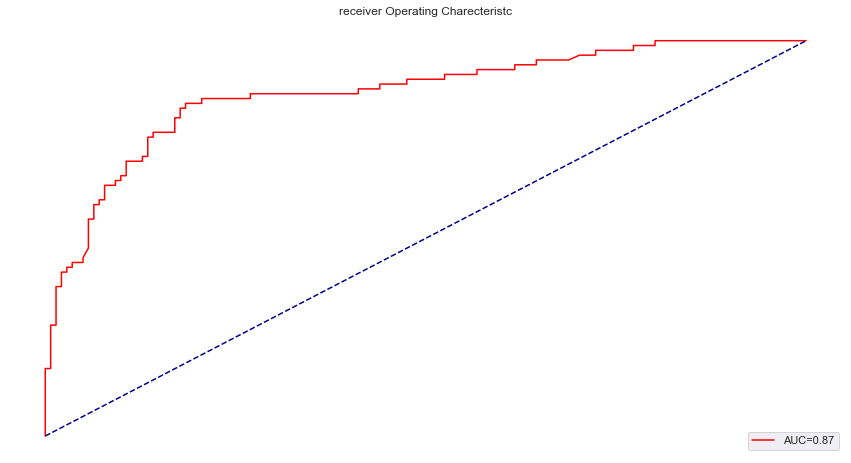

____________________________________________________________________
2 Performance of  Random Forest

 Confusion matrix :
 [[125  16]
 [ 20  62]]

 Classification report :
               precision    recall  f1-score   support

         0.0       0.86      0.89      0.87       141
         1.0       0.79      0.76      0.77        82

    accuracy                           0.84       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.84      0.84      0.84       223


 Visual Representation of Feature Importance :


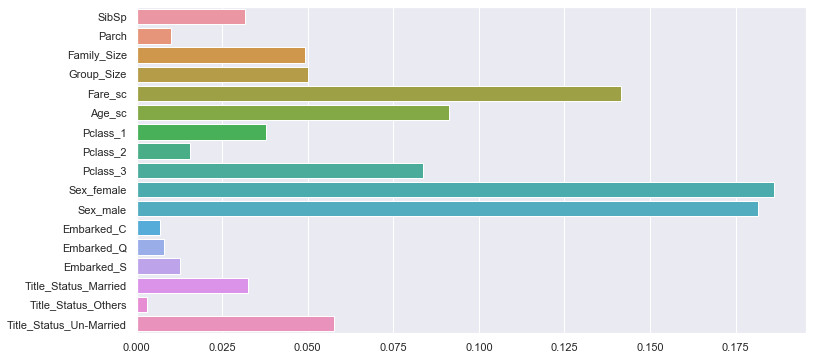

Trees can not be generated for the model


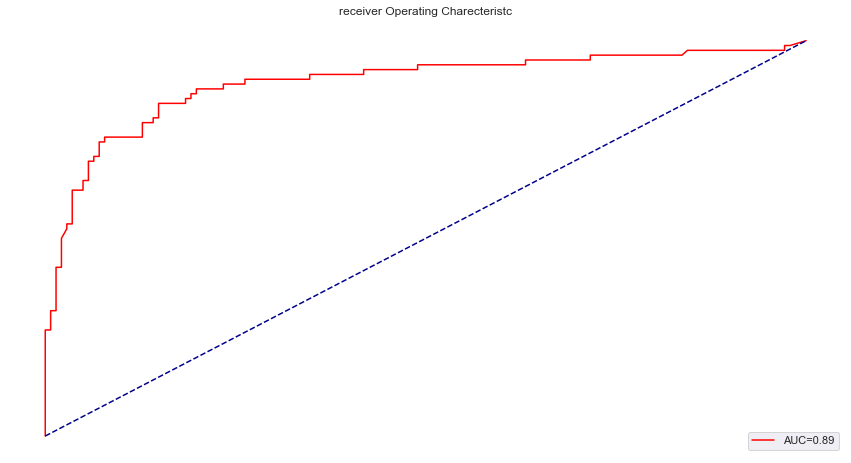

____________________________________________________________________
3 Performance of  Random Forest 2

 Confusion matrix :
 [[124  17]
 [ 17  65]]

 Classification report :
               precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       141
         1.0       0.79      0.79      0.79        82

    accuracy                           0.85       223
   macro avg       0.84      0.84      0.84       223
weighted avg       0.85      0.85      0.85       223


 Visual Representation of Feature Importance :


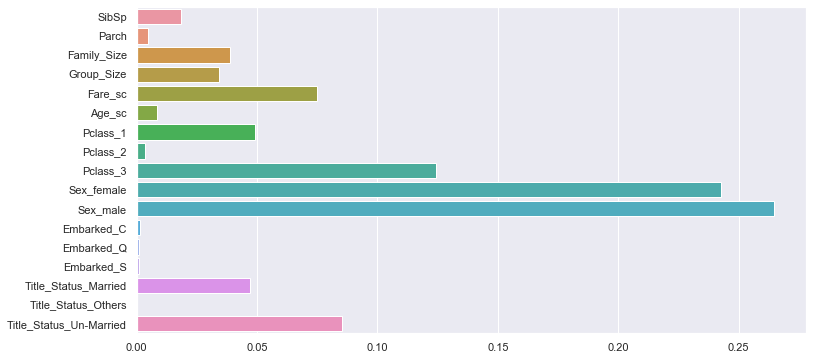

Trees can not be generated for the model


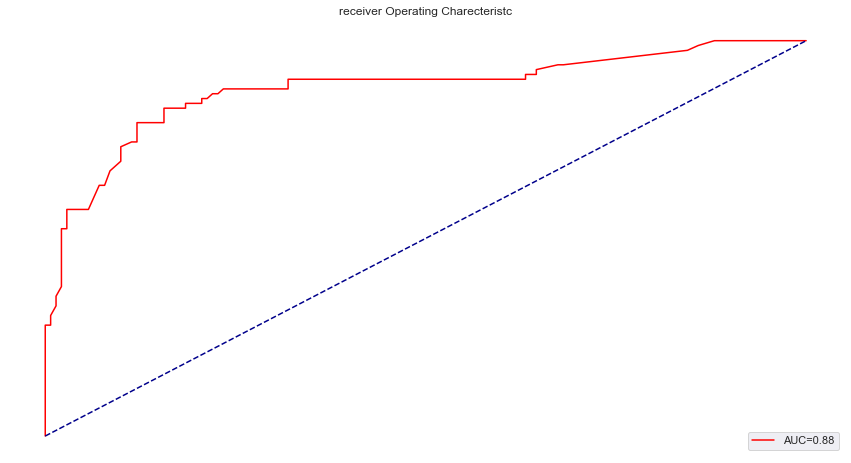

____________________________________________________________________
4 Performance of  KNeighbor

 Confusion matrix :
 [[118  23]
 [ 22  60]]

 Classification report :
               precision    recall  f1-score   support

         0.0       0.84      0.84      0.84       141
         1.0       0.72      0.73      0.73        82

    accuracy                           0.80       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223


 Visual Representation of Feature Importance :

Feature Importance details not availabe for this model
Trees can not be generated for the model


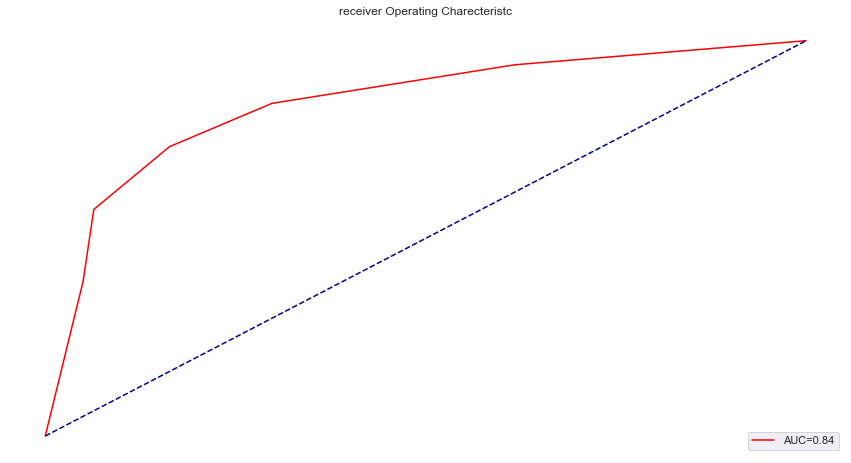

____________________________________________________________________
5 Performance of  XGBoost

 Confusion matrix :
 [[126  15]
 [ 18  64]]

 Classification report :
               precision    recall  f1-score   support

         0.0       0.88      0.89      0.88       141
         1.0       0.81      0.78      0.80        82

    accuracy                           0.85       223
   macro avg       0.84      0.84      0.84       223
weighted avg       0.85      0.85      0.85       223


 Visual Representation of Feature Importance :


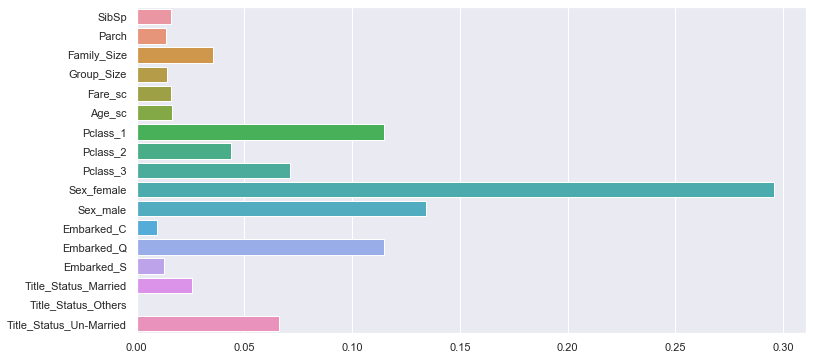

Trees can not be generated for the model


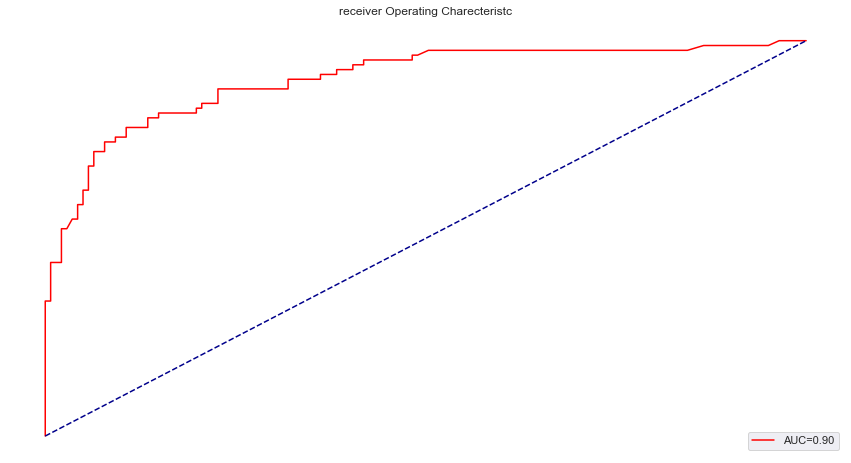

____________________________________________________________________


In [171]:
# re-executing the functions but with tunned models
run_models(tuned_models,X_train,y_train,X_test,model_type = 'Tuned')

In [172]:
# checking the scores and comparing
df_scores

,Model Name,Model Type,Threshold,Accuracy Score,Sensitivity or Recall,Specificity,Precision,F1-Score,AUC
0,Logistic Regression,Baseline,0.459720,0.825112,0.829787,0.817073,0.886364,0.774566,0.867843
1,Naive Bayes,Baseline,0.571147,0.780269,0.737589,0.853659,0.896552,0.740741,0.864383
2,KNN,Baseline,0.714286,0.798206,0.836879,0.731707,0.842857,0.727273,0.842718
3,Decision Tree,Baseline,0.875000,0.780269,0.794326,0.756098,0.848485,0.716763,0.778326
4,Random Forest,Baseline,0.429701,0.825112,0.843972,0.792683,0.875000,0.769231,0.874027
5,XGBoost,Baseline,0.415398,0.811659,0.836879,0.768293,0.861314,0.750000,0.870394
6,Logistic Regression,Tuned,0.470931,0.816143,0.822695,0.804878,0.878788,0.763006,0.868102
7,Random Forest,Tuned,0.421502,0.838565,0.886525,0.756098,0.862069,0.775000,0.893444
8,Random Forest 2,Tuned,0.465026,0.847534,0.879433,0.792683,0.879433,0.792683,0.878179
9,KNeighbor,Tuned,0.714286,0.798206,0.836879,0.731707,0.842857,0.727273,0.842718


In [174]:
# final predictions
df_pred.head()

,Logistic RegressionBaseline,Naive BayesBaseline,KNNBaseline,Decision TreeBaseline,Random ForestBaseline,XGBoostBaseline,Logistic RegressionTuned,Random ForestTuned,Random Forest 2Tuned,KNeighborTuned,XGBoostTuned
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0


In [175]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Logistic RegressionBaseline  418 non-null    float64
 1   Naive BayesBaseline          418 non-null    float64
 2   KNNBaseline                  418 non-null    float64
 3   Decision TreeBaseline        418 non-null    float64
 4   Random ForestBaseline        418 non-null    float64
 5   XGBoostBaseline              418 non-null    float64
 6   Logistic RegressionTuned     418 non-null    float64
 7   Random ForestTuned           418 non-null    float64
 8   Random Forest 2Tuned         418 non-null    float64
 9   KNeighborTuned               418 non-null    float64
 10  XGBoostTuned                 418 non-null    float64
dtypes: float64(11)
memory usage: 36.0 KB
